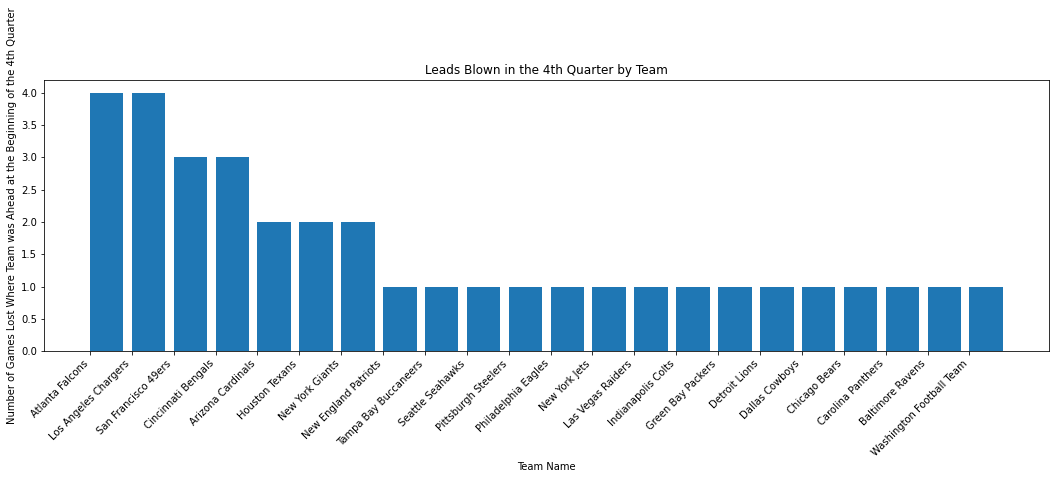

In [1]:
import requests
import pandas as pd
from pprint import pprint
import json
from Pulling_Close_Games import close_games_df
from nfl_api_version import get_pbp_stats
from QBs_WRs_season_stats import wr_season_stats
import time
import numpy as np
from config import api_key

In [2]:
close_clean = close_games_df[['Game ID', 'Home Team Name', 'Home Team Alias', 'Home Team Id', 
               'Away Team Name', 'Away Team Alias', 'Away Team Id', 
                'Final Score (Home)','Final Score (Away)', 'Game Diff (Final)',
                'Beg of the 4th Quarter Score (Home)', 
                'Beg of the 4th Quarter Score (Away)',
                'Game Diff (4th Quarter)',
                'Quarter 4 Points (Home)', 'Quarter 4 Points (Away)', 
                'Overtime Points (Home)', 'Overtime Points (Away)', 
               'Down Team Won?']]
close_clean

,Game ID,Home Team Name,Home Team Alias,Home Team Id,Away Team Name,Away Team Alias,Away Team Id,Final Score (Home),Final Score (Away),Game Diff (Final),Beg of the 4th Quarter Score (Home),Beg of the 4th Quarter Score (Away),Game Diff (4th Quarter),Quarter 4 Points (Home),Quarter 4 Points (Away),Overtime Points (Home),Overtime Points (Away),Down Team Won?
0,018556f9-1977-4a0b-8244-20cad15df9a4,Cincinnati Bengals,CIN,ad4ae08f-d808-42d5-a1e6-e9bc4e34d123,Los Angeles Chargers,LAC,1f6dcffb-9823-43cd-9ff4-e7a8466749b5,13.0,16.0,-3.0,13.0,6.0,7.0,0.0,10.0,None,None,True
1,10339048-8c6b-43c7-ae7c-d68cf44417d3,Denver Broncos,DEN,ce92bd47-93d5-4fe9-ada4-0fc681e6caa0,Tennessee Titans,TEN,d26a1ca5-722d-4274-8f97-c92e49c96315,14.0,16.0,-2.0,7.0,7.0,0.0,7.0,9.0,None,None,False
2,213b8eda-43d8-4e62-9951-ed4c605fca0d,Minnesota Vikings,MIN,33405046-04ee-4058-a950-d606f8c30852,Green Bay Packers,GB,a20471b4-a8d9-40c7-95ad-90cc30e46932,34.0,43.0,-9.0,10.0,29.0,-19.0,24.0,14.0,None,None,False
3,24734cde-bf1b-46e5-ad50-d61e47aeca26,Jacksonville Jaguars,JAC,f7ddd7fa-0bae-4f90-bc8e-669e4d6cf2de,Indianapolis Colts,IND,82cf9565-6eb9-4f01-bdbd-5aa0d472fcd9,27.0,20.0,7.0,17.0,17.0,0.0,10.0,3.0,None,None,False
4,5a5b0a83-1765-4729-b914-73ff7d4c4c89,Carolina Panthers,CAR,f14bf5cc-9a82-4a38-bc15-d39f75ed5314,Las Vegas Raiders,LV,7d4fcc64-9cb5-4d1b-8e75-8a906d1e1576,30.0,34.0,-4.0,15.0,27.0,-12.0,15.0,7.0,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,7b9e1d03-4907-4a24-8f43-ef651804f3ff,Kansas City Chiefs,KC,6680d28d-d4d2-49f6-aace-5292d3ec02c2,Cleveland Browns,CLE,d5a2eb42-8065-4174-ab79-0a6fa820e35e,22.0,17.0,5.0,22.0,10.0,12.0,0.0,7.0,None,None,False
3,c4032aec-ffc3-4275-994d-19aba97c1bc4,New Orleans Saints,NO,0d855753-ea21-4953-89f9-0e20aff9eb73,Tampa Bay Buccaneers,TB,4254d319-1bc7-4f81-b4ab-b5e6f3402b69,20.0,30.0,-10.0,20.0,20.0,0.0,0.0,10.0,None,None,False
0,8328733a-b4b9-47b9-bd2e-b3a38a87442e,Green Bay Packers,GB,a20471b4-a8d9-40c7-95ad-90cc30e46932,Tampa Bay Buccaneers,TB,4254d319-1bc7-4f81-b4ab-b5e6f3402b69,26.0,31.0,-5.0,23.0,28.0,-5.0,3.0,3.0,None,None,False
1,cef80d79-ce26-434f-9f44-b560b66fa83e,Kansas City Chiefs,KC,6680d28d-d4d2-49f6-aace-5292d3ec02c2,Buffalo Bills,BUF,768c92aa-75ff-4a43-bcc0-f2798c2e1724,38.0,24.0,14.0,31.0,15.0,16.0,7.0,9.0,None,None,False


In [3]:
close = close_clean[abs(close_clean['Game Diff (Final)'])<3]
close

,Game ID,Home Team Name,Home Team Alias,Home Team Id,Away Team Name,Away Team Alias,Away Team Id,Final Score (Home),Final Score (Away),Game Diff (Final),Beg of the 4th Quarter Score (Home),Beg of the 4th Quarter Score (Away),Game Diff (4th Quarter),Quarter 4 Points (Home),Quarter 4 Points (Away),Overtime Points (Home),Overtime Points (Away),Down Team Won?
1,10339048-8c6b-43c7-ae7c-d68cf44417d3,Denver Broncos,DEN,ce92bd47-93d5-4fe9-ada4-0fc681e6caa0,Tennessee Titans,TEN,d26a1ca5-722d-4274-8f97-c92e49c96315,14.0,16.0,-2.0,7.0,7.0,0.0,7.0,9.0,None,None,False
11,a76ed880-ef6c-43a3-b2a2-f6eae7f072b2,Dallas Cowboys,DAL,e627eec7-bbae-4fa4-8e73-8e1d6bc5c060,Atlanta Falcons,ATL,e6aa13a4-0055-48a9-bc41-be28dc106929,40.0,39.0,1.0,24.0,29.0,-5.0,16.0,10.0,NaN,NaN,True
2,4b48bcbc-a0f5-4e58-aa5f-0f57fc34c1d6,Minnesota Vikings,MIN,33405046-04ee-4058-a950-d606f8c30852,Tennessee Titans,TEN,d26a1ca5-722d-4274-8f97-c92e49c96315,30.0,31.0,-1.0,24.0,25.0,-1.0,6.0,6.0,NaN,NaN,False
4,664eab35-3dfe-491b-b98d-b4ebfe0c4906,Philadelphia Eagles,PHI,386bdbf9-9eea-4869-bb9a-274b0bc66e80,Cincinnati Bengals,CIN,ad4ae08f-d808-42d5-a1e6-e9bc4e34d123,23.0,23.0,0.0,16.0,17.0,-1.0,7.0,6.0,0,0,False
5,adcc4902-b1af-486a-838e-8ca23f72eebd,Chicago Bears,CHI,7b112545-38e6-483c-a55c-96cf6ee49cb8,Tampa Bay Buccaneers,TB,4254d319-1bc7-4f81-b4ab-b5e6f3402b69,20.0,19.0,1.0,14.0,16.0,-2.0,6.0,3.0,NaN,NaN,True
9,dc223e91-352a-4e06-b4bb-8d1f841ea7b7,Seattle Seahawks,SEA,3d08af9e-c767-4f88-a7dc-b920c6d2b4a8,Minnesota Vikings,MIN,33405046-04ee-4058-a950-d606f8c30852,27.0,26.0,1.0,21.0,19.0,2.0,6.0,7.0,NaN,NaN,False
2,354151c3-fded-48aa-8ade-cc49dff33efc,New York Giants,NYG,04aa1c9d-66da-489d-b16a-1dee3f2eec4d,Washington Football Team,WAS,22052ff7-c065-42ee-bc8f-c4691c50e624,20.0,19.0,1.0,13.0,10.0,3.0,7.0,9.0,NaN,NaN,False
13,f478f156-43d2-4b8e-af27-4e66b960a335,Philadelphia Eagles,PHI,386bdbf9-9eea-4869-bb9a-274b0bc66e80,Baltimore Ravens,BAL,ebd87119-b331-4469-9ea6-d51fe3ce2f1c,28.0,30.0,-2.0,6.0,24.0,-18.0,22.0,6.0,NaN,NaN,False
6,6b74b6c3-0208-4e22-9df5-0e52a14ff2e5,Philadelphia Eagles,PHI,386bdbf9-9eea-4869-bb9a-274b0bc66e80,New York Giants,NYG,04aa1c9d-66da-489d-b16a-1dee3f2eec4d,22.0,21.0,1.0,10.0,14.0,-4.0,12.0,7.0,NaN,NaN,True
12,eb40fc37-7841-4e32-a896-5299262c2c43,Atlanta Falcons,ATL,e6aa13a4-0055-48a9-bc41-be28dc106929,Detroit Lions,DET,c5a59daa-53a7-4de0-851f-fb12be893e9e,22.0,23.0,-1.0,14.0,13.0,1.0,8.0,10.0,NaN,NaN,True


In [4]:
top_wr = pd.DataFrame({'Name': ['Davante Adams', 'Calvin Ridley', 'Adam Thielen', 'Mike Evans', 'Allen Robinson II', 
                               'Tyreek Hill', 'JuJu Smith-Schuster', 'Keenan Allen', 'D.K. Metcalf', 'Tyler Lockett',
                               'Stefon Diggs'],
                      'Player ID': ['e7d6ae25-bf15-4660-8b37-c37716551de3', '926e2674-52d6-4cec-9991-46ee85cc8cfd', 
                                    '2fa2b2da-4aa9-44b5-b27e-56876dfe2ad4', 'c48c21d9-0ae5-478c-ad34-30a660cfa9b8', 
                                   '0fd32417-8410-4a8f-8919-386c433bca43', '01d8aee3-e1c4-4988-970a-8c0c2d08bd83', 
                                   '9547fbb1-0d4f-4d9e-83b9-e2fa30463bb9', '5f424505-f29f-433c-b3f2-1a143a04a010',
                                   '754faf0f-40f7-45f0-b23b-6ce990ecaf26', 'dffa69ad-331e-4f09-ae38-40a5a4406be6',
                                   'a1c40664-b265-4083-aad2-54b4c734f2c5'],
                      'Player Team Alias': ['GB', 'ATL', 'MIN', 'TB', 'CHI', 'KC', 'PIT', 'LAC', 'SEA', 'SEA', 'BUF']})
top_and_close = pd.DataFrame({'Name':[],
                             'Player ID':[],
                             'Player Team Alias': [],
                             'Game ID':[]})
for i in range(len(top_wr['Player Team Alias'])):
    df = close[(close['Home Team Alias']==list(top_wr['Player Team Alias'])[i]) | (close['Away Team Alias']==list(top_wr['Player Team Alias'])[i])]
    if df.empty == False:
        top_and_close = top_and_close.append({'Name':list(top_wr['Name'])[i], 
                                              'Player ID':list(top_wr['Player ID'])[i], 
                                              'Player Team Alias': list(top_wr['Player Team Alias'])[i], 
                                              'Game ID':list(df['Game ID'])[0]}, ignore_index = True)

In [5]:
top_wr

,Name,Player ID,Player Team Alias
0,Davante Adams,e7d6ae25-bf15-4660-8b37-c37716551de3,GB
1,Calvin Ridley,926e2674-52d6-4cec-9991-46ee85cc8cfd,ATL
2,Adam Thielen,2fa2b2da-4aa9-44b5-b27e-56876dfe2ad4,MIN
3,Mike Evans,c48c21d9-0ae5-478c-ad34-30a660cfa9b8,TB
4,Allen Robinson II,0fd32417-8410-4a8f-8919-386c433bca43,CHI
5,Tyreek Hill,01d8aee3-e1c4-4988-970a-8c0c2d08bd83,KC
6,JuJu Smith-Schuster,9547fbb1-0d4f-4d9e-83b9-e2fa30463bb9,PIT
7,Keenan Allen,5f424505-f29f-433c-b3f2-1a143a04a010,LAC
8,D.K. Metcalf,754faf0f-40f7-45f0-b23b-6ce990ecaf26,SEA
9,Tyler Lockett,dffa69ad-331e-4f09-ae38-40a5a4406be6,SEA


In [6]:
top_and_close

,Name,Player ID,Player Team Alias,Game ID
0,Calvin Ridley,926e2674-52d6-4cec-9991-46ee85cc8cfd,ATL,a76ed880-ef6c-43a3-b2a2-f6eae7f072b2
1,Adam Thielen,2fa2b2da-4aa9-44b5-b27e-56876dfe2ad4,MIN,4b48bcbc-a0f5-4e58-aa5f-0f57fc34c1d6
2,Mike Evans,c48c21d9-0ae5-478c-ad34-30a660cfa9b8,TB,adcc4902-b1af-486a-838e-8ca23f72eebd
3,Allen Robinson II,0fd32417-8410-4a8f-8919-386c433bca43,CHI,adcc4902-b1af-486a-838e-8ca23f72eebd
4,Tyreek Hill,01d8aee3-e1c4-4988-970a-8c0c2d08bd83,KC,c5fa2cf5-6aca-4c12-b258-0d6b1b922b90
5,JuJu Smith-Schuster,9547fbb1-0d4f-4d9e-83b9-e2fa30463bb9,PIT,ffefae13-6fa5-4699-960f-0a7fd3c1265d
6,Keenan Allen,5f424505-f29f-433c-b3f2-1a143a04a010,LAC,a06990f4-c5bf-4b3b-9743-622dbdc0897d
7,D.K. Metcalf,754faf0f-40f7-45f0-b23b-6ce990ecaf26,SEA,dc223e91-352a-4e06-b4bb-8d1f841ea7b7
8,Tyler Lockett,dffa69ad-331e-4f09-ae38-40a5a4406be6,SEA,dc223e91-352a-4e06-b4bb-8d1f841ea7b7
9,Stefon Diggs,a1c40664-b265-4083-aad2-54b4c734f2c5,BUF,69192d97-c724-445f-8b9a-cf0d83f613b9


In [7]:
wr_season_stats.columns

Index(['Player ID', 'Name', 'Position', 'Air Yards', 'Yards Per Reception',
       'Broken Tackles Receiving', 'Catchable Passes Dropped',
       'Total Dropped Passes', 'Longest Reception', 'Longest TD Reception',
       'Receptions', 'Redzone Targets', 'Targets', 'TD Receptions',
       'Reception Yards', 'Yards After Catch', 'Yards After Contact Receiving',
       'Scrambles', 'Rushing Attempts', 'Yards Per Rush',
       'Broken Tackles Rushing', 'Kneel Downs', 'Longest Rush',
       'Longest TD Run', 'Redzone Rushing Attempts', 'Negative Rushes',
       'Yards Lost Rushing', 'Rushing Touchdowns', 'Total Rushing Yards',
       'Yards After Contact Rushing', 'Fumbles', 'Fumbles Lost'],
      dtype='object')

In [13]:
test = get_pbp_stats('a76ed880-ef6c-43a3-b2a2-f6eae7f072b2', '926e2674-52d6-4cec-9991-46ee85cc8cfd')

In [14]:
test.columns

Index(['stat_type', 'attempt', 'yards', 'firstdown', 'inside_20', 'goaltogo',
       'broken_tackles', 'kneel_down', 'scramble', 'yards_after_contact',
       'tackle', 'missed_tackles', 'def_target', 'def_comp', 'blitz', 'hurry',
       'knockdown', 'batted_pass', 'category', 'complete', 'att_yards',
       'incompletion_type', 'pocket_time', 'on_target_throw', 'target',
       'dropped', 'catchable', 'touchdown', 'reception', 'yards_after_catch',
       'made', 'endzone', 'onside_attempt', 'onside_success', 'squib_kick',
       'return', 'ast_tackle', 'primary', 'qb_hit', 'down', 'tlost',
       'tlost_yards', 'penalty', 'missed', 'gross_yards', 'touchback',
       'pass_defended', 'sack', 'sack_yards', 'hang_time', 'nullified',
       'own_rec', 'player.id', 'player.name', 'player.jersey',
       'player.reference', 'player.position', 'player.sr_id', 'team.id',
       'team.name', 'team.market', 'team.alias', 'team.reference',
       'team.sr_id', 'player'],
      dtype='object')

In [30]:
test[['target','dropped', 'yards_after_catch']]

,target,dropped,yards_after_catch
4,1.0,0.0,NaN
52,1.0,0.0,2.0


In [32]:
targets = test['target'].sum()
targets

2.0

In [29]:
wr_season_stats[wr_season_stats['Player ID']=='926e2674-52d6-4cec-9991-46ee85cc8cfd'][['Targets','Total Dropped Passes','Yards After Catch']]


,Targets,Total Dropped Passes,Yards After Catch
40,143.0,6.0,275.0


In [44]:
comparison_df = pd.DataFrame({'Name':[],
                       'Player ID':[],
                       'Player Team Alias':[],
                       'Targets':[],
                      'Dropped': [],
                      'Yards After Catch': [],
                      'Targets Season Avg': [],
                      'Dropped Season Avg': [],
                      'Yards After Catch Avg': []})

for row in range(len(top_and_close)):
    player_id = list(top_and_close['Player ID'])[row]
    game_id = list(top_and_close['Game ID'])[row]
    pressure_stats = get_pbp_stats(game_id, player_id)[['target','dropped', 'yards_after_catch']]
    targets = pressure_stats['target'].sum()
    dropped = pressure_stats['dropped'].sum()
    yac = pressure_stats['yards_after_catch'].sum()
    season_stats = wr_season_stats[wr_season_stats['Player ID']==player_id][['Targets','Total Dropped Passes','Yards After Catch']]
    targets_avg = (list(season_stats['Targets'])[0])/68
    dropped_avg = (list(season_stats['Total Dropped Passes'])[0])/68
    yac_avg = (list(season_stats['Yards After Catch'])[0])/68
    comparison_df = comparison_df.append({'Name':list(top_and_close['Name'])[row],
                       'Player ID':list(top_and_close['Player ID'])[row],
                       'Player Team Alias': list(top_and_close['Player Team Alias'])[row],
                       'Targets':pressure_stats['target'].sum(),
                      'Dropped': pressure_stats['dropped'].sum(),
                      'Yards After Catch': yac,
                      'Targets Season Avg': targets_avg,
                      'Dropped Season Avg': dropped_avg,
                      'Yards After Catch Avg': yac_avg}, ignore_index = True)

In [49]:
comparison_df

,Name,Player ID,Player Team Alias,Targets,Dropped,Yards After Catch,Targets Season Avg,Dropped Season Avg,Yards After Catch Avg
0,Calvin Ridley,926e2674-52d6-4cec-9991-46ee85cc8cfd,ATL,2.0,0.0,2.0,2.102941,0.088235,4.044118
1,Adam Thielen,2fa2b2da-4aa9-44b5-b27e-56876dfe2ad4,MIN,2.0,0.0,3.0,1.588235,0.102941,3.573529
2,Mike Evans,c48c21d9-0ae5-478c-ad34-30a660cfa9b8,TB,2.0,0.0,0.0,1.602941,0.058824,3.897059
3,Allen Robinson II,0fd32417-8410-4a8f-8919-386c433bca43,CHI,4.0,0.0,5.0,2.220588,0.044118,4.691176
4,Tyreek Hill,01d8aee3-e1c4-4988-970a-8c0c2d08bd83,KC,4.0,0.0,0.0,1.985294,0.073529,6.382353
5,JuJu Smith-Schuster,9547fbb1-0d4f-4d9e-83b9-e2fa30463bb9,PIT,2.0,0.0,1.0,1.882353,0.044118,6.014706
6,Keenan Allen,5f424505-f29f-433c-b3f2-1a143a04a010,LAC,1.0,0.0,0.0,2.161765,0.044118,6.426471
7,D.K. Metcalf,754faf0f-40f7-45f0-b23b-6ce990ecaf26,SEA,7.0,0.0,11.0,1.897059,0.117647,5.338235
8,Tyler Lockett,dffa69ad-331e-4f09-ae38-40a5a4406be6,SEA,2.0,1.0,4.0,1.941176,0.117647,4.808824
9,Stefon Diggs,a1c40664-b265-4083-aad2-54b4c734f2c5,BUF,5.0,0.0,33.0,2.441176,0.117647,6.823529


In [47]:
import matplotlib.pyplot as plt

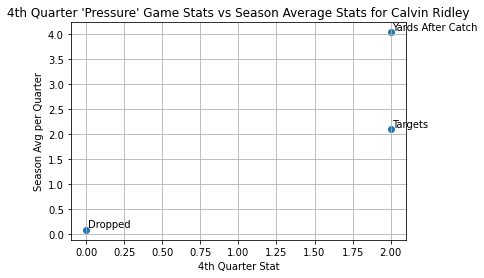

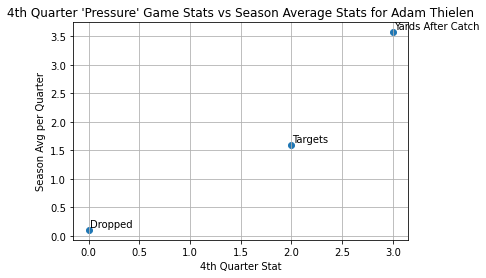

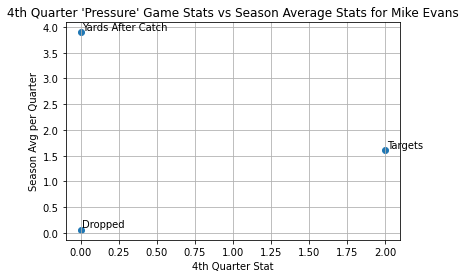

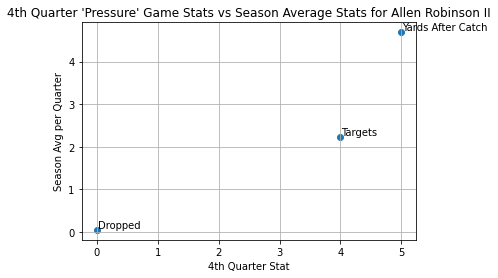

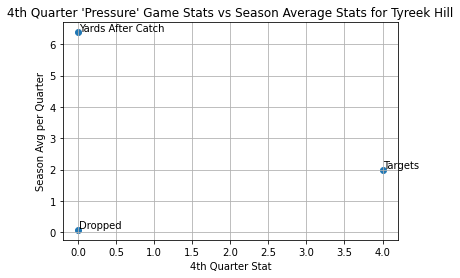

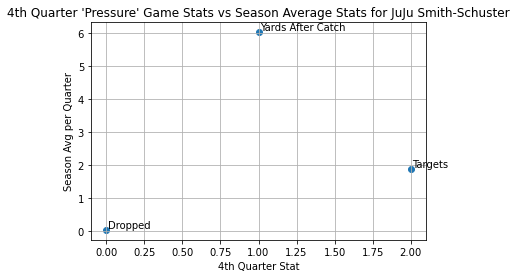

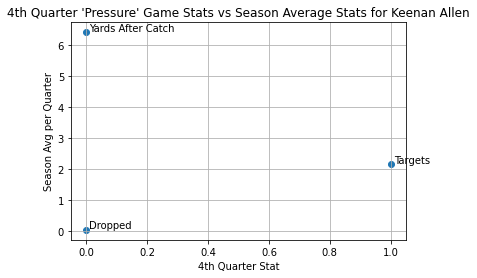

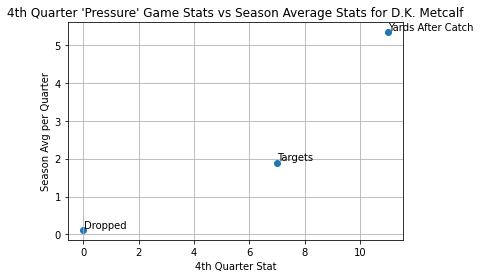

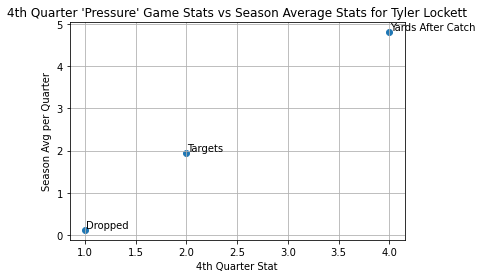

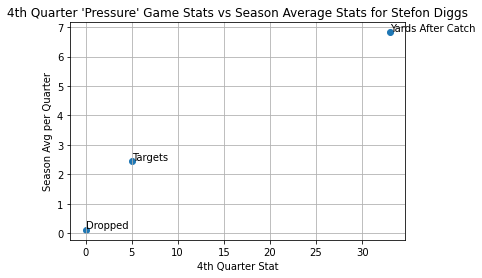

In [65]:
def plot_this_df(player_df):
    x_vals = [player_df['Targets'], player_df['Dropped'], player_df['Yards After Catch']]
    y_vals = [player_df['Targets Season Avg'],player_df['Dropped Season Avg'], player_df['Yards After Catch Avg']]
    annotations = ['Targets', 'Dropped', 'Yards After Catch']
    fig, ax = plt.subplots()
    ax.scatter(x_vals, y_vals)
    ax.set(title = f"4th Quarter 'Pressure' Game Stats vs Season Average Stats for {str(list(player_df['Name']))[2:-2]}",
          xlabel = "4th Quarter Stat",
          ylabel = "Season Avg per Quarter")
    for k, label in enumerate(annotations):
        plt.annotate(label, (x_vals[k]+0.01, y_vals[k]+0.05))
    ax.grid()
    plt.savefig(f"4th Quarter 'Pressure' Game Stats vs Season Average Stats for {str(list(player_df['Name']))[2:-2]}.png");

for i in range(len(comparison_df)):
    player_df = comparison_df[comparison_df['Name']==list(comparison_df['Name'])[i]]
    plot_this_df(player_df)